In [57]:
# Dependencies and Setup
from census import Census
from us import states
from config import (census_key, gkey)
import us
import gmaps
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sodapy import Socrata
import requests
import json

In [82]:
file='counties.csv'
data_df=pd.read_csv(file,encoding='ISO-8859-1')
data_df.head()

,FIPS,County,State,Latitude,Longitude,confirm_5,confirm_10,confirm_20,confirm_50,death_5,death_10,death_20,death_50,Population,Population Density,Median Household Income,Poverty Rate
0,1001,Autauga,Alabama,32.539527,-86.644082,6.0,10.0,NaN,NaN,0.0,0.0,NaN,NaN,55049.0,93.534505,53099.0,12.165525
1,1003,Baldwin,Alabama,30.727750,-87.722071,1.0,4.0,28.0,NaN,0.0,0.0,1.0,NaN,199510.0,137.138546,51365.0,12.806877
2,1005,Barbour,Alabama,31.868263,-85.387129,3.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,26614.0,28.114060,33956.0,23.427519
3,1007,Bibb,Alabama,32.996421,-87.125115,4.0,9.0,NaN,NaN,0.0,0.0,NaN,NaN,22572.0,35.986169,39776.0,15.018607
4,1009,Blount,Alabama,33.982109,-86.567906,5.0,9.0,NaN,NaN,0.0,0.0,NaN,NaN,57704.0,89.697955,46212.0,16.361084


In [87]:
population_mean = round(data_df['Population Density'].astype('float').mean(), 2)
population_median = round(data_df['Population Density'].astype('float').median(), 2)
population_mode = round(data_df['Population Density'].astype('float').mode(), 2).head()
print(f"Population Mean: {population_mean}")
print(f"Population Median {population_median}")
print(f"Population mode {population_mode}")


Population Mean: 273.1
Population Median 44.8
Population mode 0    0.04
1    0.07
2    0.08
3    0.11
4    0.16
dtype: float64


In [60]:
new_df = data_df.copy()
state_stats = new_df.groupby('State').agg({"Population":['mean','median','var','std','sem'],
                                              "Population Density":['mean','median','var','std','sem'],
                                              "Median Household Income":['mean','median','var','std','sem'],
                                              "Poverty Rate":['mean','median','var','std','sem']
                                          })
state_stats = round(state_stats,2)
pd.set_option("display.max_rows", None, "display.max_columns", None)
state_stats.head(50)




Population                                      \
                           mean    median           var         std   
State                                                                 
Alabama                72256.18   34018.0  1.109484e+10   105332.05   
Alaska                 25408.79    6970.0  3.443900e+09    58684.75   
Arizona               448571.80  128177.0  1.075190e+12  1036913.89   
Arkansas               39579.63   18688.0  3.558461e+09    59652.84   
California            666451.83  181114.0  2.130246e+12  1459536.23   
Colorado               83738.98   14406.0  2.876665e+10   169607.34   
Connecticut           448571.25  228587.0  1.417617e+11   376512.51   
Delaware              311565.00  211224.0  4.375068e+10   209166.62   
District of Columbia  659009.00  659009.0           NaN         NaN   
Florida               297529.12  113589.0  2.263010e+11   475711.10   
Georgia                63517.74   22778.0  1.855862e+10   136230.04   
Hawaii                282734.60  162456.0  1.608349e+11   401042.22   
Idaho                  37170.07   12954.5  5.195859e+09    72082.31   
Illinois              125996.90   26736.5  2.817727e+11   530822.65   
Indiana                71625.85   33981.5  1.440924e+10   120038.51   
Iowa                   31379.69   15552.0  3.133048e+09    55973.64   
Kansas                 27602.78    6988.0  5.982640e+09    77347.53   
Kentucky               36766.57   18892.5  5.833015e+09    76374.17   
Louisiana              72588.59   33462.0  9.572983e+09    97841.62   
Maine                  83120.19   52923.0  5.582178e+09    74713.98   
Maryland              248329.25  106425.0  9.165401e+10   302744.13   
Massachusetts         481581.64  487364.5  1.853227e+11   430491.22   
Michigan              119392.77   38330.0  6.696877e+10   258783.26   
Minnesota              62653.66   21729.0  2.270286e+10   150674.69   
Mississippi            36453.56   23162.0  1.826619e+09    42738.96   
Missouri               52692.62   18475.0  1.526386e+10   123547.01   
Montana                18274.84    7252.0  9.949779e+08    31543.27   
Nebraska               20228.59    6313.0  4.321112e+09    65735.17   
Nevada                167010.12   17091.0  2.511552e+11   501153.86   
New Hampshire         132750.30   82742.0  1.535681e+10   123922.59   
New Jersey            424545.52  450236.0  6.753880e+10   259882.28   
New Mexico             63111.18   27373.0  1.448541e+10   120355.37   
New York              317700.92   89808.0  3.015642e+11   549148.62   
North Carolina         99408.28   55513.5  2.401019e+10   154952.21   
North Dakota           13889.85    4284.0  7.775596e+08    27884.76   
Ohio                  131669.78   57754.0  4.628375e+10   215136.58   
Oklahoma               50332.32   22161.0  1.288850e+10   113527.55   
Oregon                110618.53   42172.5  2.949374e+10   171737.43   
Pennsylvania          190805.63   87491.0  7.443284e+10   272823.82   
Rhode Island          210898.20  126319.0  5.715347e+10   239067.92   
South Carolina        105100.11   58539.0  1.354015e+10   116362.15   
South Dakota           12894.82    5506.5  6.871262e+08    26213.09   
Tennessee              68926.41   31335.0  1.696630e+10   130254.77   
Texas                 106127.70   18408.5  1.458626e+11   381919.64   
Utah                  101669.90   20733.0  5.112319e+10   226104.37   
Vermont                44732.07   36714.5  1.397501e+09    37383.16   
Virginia               62483.47   25290.0  1.526379e+10   123546.72   
Washington            181362.72   61060.0  1.346735e+11   366978.83   
West Virginia          33565.31   23473.0  1.116697e+09    33417.01   
Wisconsin              79927.75   40985.5  1.813853e+10   134679.37   

                                Population Density                          \
                            sem               mean    median           var   
State                                                                        
Alabama                

In [61]:
new_df1 = data_df.copy()
clean_df = new_df1.dropna(how='any')
case_stats = new_df1.groupby('State').agg({"confirm_5":['mean','median','var','std','sem'],
                                          "confirm_10":['mean','median','var','std','sem'],
                                          "confirm_20":['mean','median','var','std','sem'],
                                          "confirm_50":['mean','median','var','std','sem'],
                                          "death_5":['mean','median','var','std','sem'],
                                          "death_10":['mean','median','var','std','sem'],
                                          "death_20":['mean','median','var','std','sem'],
                                          "death_50":['mean','median','var','std','sem']
                                         })
pd.set_option("display.max_rows", None, "display.max_columns", None)
case_stats.head()

confirm_5                                         confirm_10  \
                mean median         var        std       sem       mean   
State                                                                     
Alabama     3.454545    3.0   11.667133   3.415718  0.420446  10.483333   
Alaska      3.111111    3.0    3.611111   1.900292  0.633431   9.333333   
Arizona     4.066667    2.0   20.780952   4.558613  1.177029  11.400000   
Arkansas    5.031746    1.0  151.579621  12.311768  1.551137  10.529412   
California  3.826923    2.0   10.106712   3.179106  0.440863   9.812500   

                                                   confirm_20         \
           median         var        std       sem       mean median   
State                                                                  
Alabama       7.0  139.745480  11.821399  1.526136  62.857143   33.0   
Alaska       10.0   11.466667   3.386247  1.382429  44.666667   53.0   
Arizona       5.0  267.400000  16.352370  4.222164  83.454545   35.0   
Arkansas      5.0  319.254118  17.867684  2.501976  39.000000   39.0   
California    5.0  108.751330  10.428391  1.505209  56.459459   31.0   

                                                confirm_50                  \
                     var         std        sem       mean median      var   
State                                                                        
Alabama      5214.128571   72.208923  15.757279        NaN    NaN      NaN   
Alaska        754.333333   27.465129  15.857000        NaN    NaN      NaN   
Arizona     12761.872727  112.968459  34.061272        4.0    4.0      NaN   
Arkansas      200.000000   14.142136  10.000000        NaN    NaN      NaN   
California   5629.921922   75.032806  12.335317      174.4   53.0  63247.3   

                                     death_5                             \
                   std         sem      mean median       var       std   
State                                                                     
Alabama            NaN         NaN  0.000000    0.0  0.000000  0.000000   
Alaska             NaN         NaN  0.000000    0.0  0.000000  0.000000   
Arizona            NaN         NaN  0.000000    0.0  0.000000  0.000000   
Arkansas           NaN         NaN  0.015873    0.0  0.015873  0.125988   
California  251.490159  112.469818  0.038462    0.0  0.037707  0.194184   

                      death_10                                       death_20  \
                 sem      mean median       var       std       sem      mean   
State                                                                           
Alabama     0.000000  0.150000    0.0  0.231356  0.480995  0.062096  1.857143   
Alaska      0.000000  0.000000    0.0  0.000000  0.000000  0.000000  0.333333   
Arizona     0.000000  0.133333    0.0  0.266667  0.516398  0.133333  1.363636   
Arkansas    0.015873  0.098039    0.0  0.130196  0.360827  0.050526  0.000000   
California  0.026928  0.187500    0.0  0.325798  0.570787  0.082386  1.270270   

                                                death_50               \
           median       var       std       sem     mean median   var   
State                                                                   
Alabama       1.0  6.228571  2.495711  0.544609      NaN    NaN   NaN   
Alaska        0.0  0.333333  0.577350  0.333333      NaN    NaN   NaN   
Arizona       0.0  9.654545  3.107176  0.936849      0.0    0.0   NaN   
Arkansas      0.0  0.000000  0.000000  0.000000      NaN    NaN   NaN   
California    1.0  6.647147  2.578206  0.423854      3.4    1.0  14.3   

                                
                 std       sem  
State                           
Alabama          NaN       NaN  
Alaska           NaN       NaN  
Arizona          NaN       NaN  
Arkansas         NaN       NaN  
California  3.781534  1.691153

In [62]:
def scatterplot(x,y):
    temp_df = data_df[[x,y]]
    temp_df = temp_df.dropna()
    x_values = temp_df[x].astype('float')
    y_values = temp_df[y].astype('float')
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
    # Plot scatter plot
    plt.scatter(x_values,y_values)
    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(np.max(x_values)*.6,np.max(y_values)*.9),fontsize=15,color="red")
    # Label plot
    plt.xlabel(x)
    plt.ylabel(y)
    # Print r square value
    print(f"R squared: {rvalue**2}")
    # Show plot
    plt.show()

R squared: 0.03360320545778395


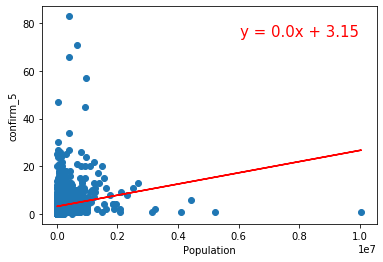

<Figure size 432x288 with 0 Axes>

In [81]:
scatterplot('Population','confirm_5')
plt.savefig('sample.png')

R squared: 0.08756577588754744


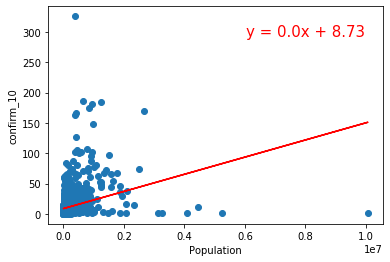

In [64]:
scatterplot('Population','confirm_10')

R squared: 0.08253966948993142


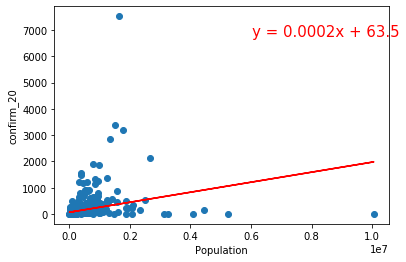

In [65]:
scatterplot('Population','confirm_20')

R squared: 0.012656619758200824


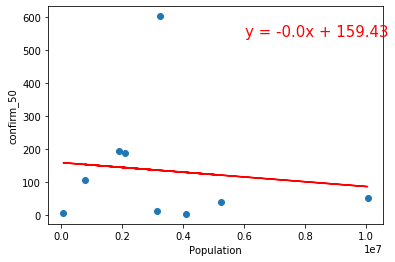

In [66]:
scatterplot('Population','confirm_50')

R squared: 2.528846764676078e-05


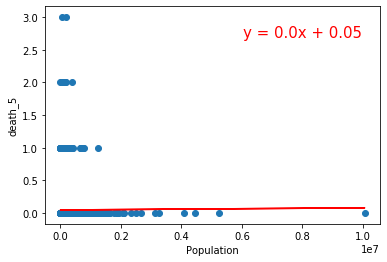

In [67]:
scatterplot('Population','death_5')

R squared: 0.007848099210396808


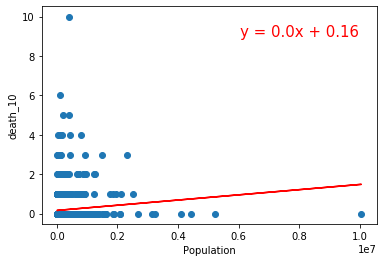

In [68]:
scatterplot('Population','death_10')

R squared: 0.038729330576342126


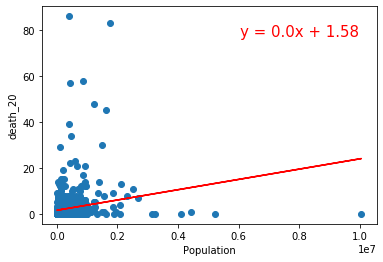

In [69]:
scatterplot('Population','death_20')

R squared: 0.05738011216414332


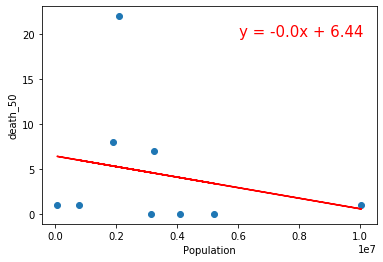

In [70]:
scatterplot('Population','death_50')

R squared: 7.619166064103967e-05


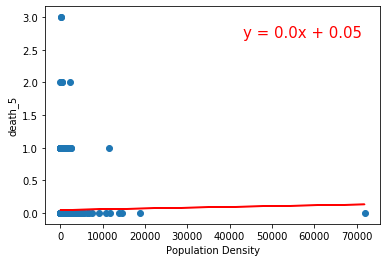

In [71]:
scatterplot('Population Density','death_5')

R squared: 0.0018044603462119588


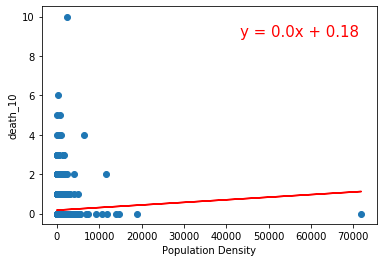

In [72]:
scatterplot('Population Density','death_10')

R squared: 0.07810495237355959


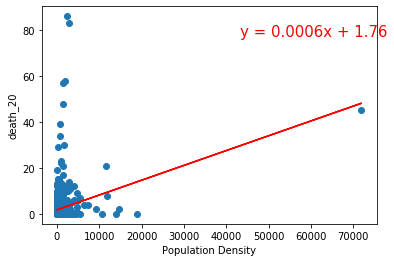

In [73]:
scatterplot('Population Density','death_20')

R squared: 0.08832074730524737


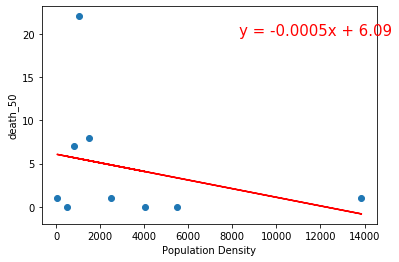

In [74]:
scatterplot('Population Density','death_50')

R squared: 0.022152131172348596


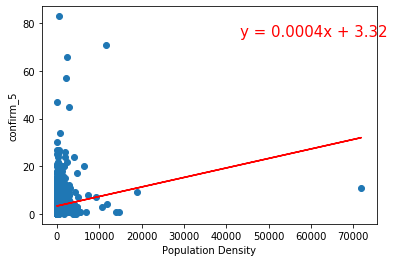

In [75]:
scatterplot('Population Density','confirm_5')

R squared: 0.043227516330663976


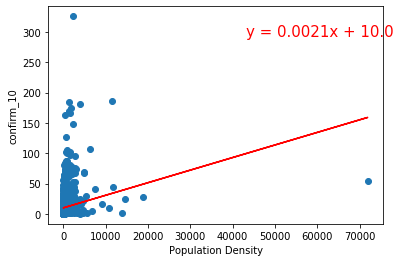

In [76]:
scatterplot('Population Density','confirm_10')

R squared: 0.4928382912581235


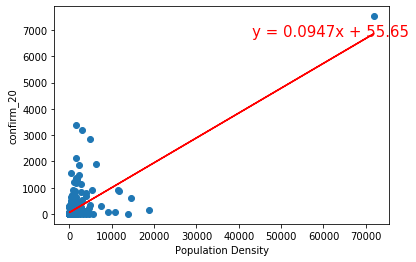

In [77]:
scatterplot('Population Density','confirm_20')

R squared: 0.029143954219446513


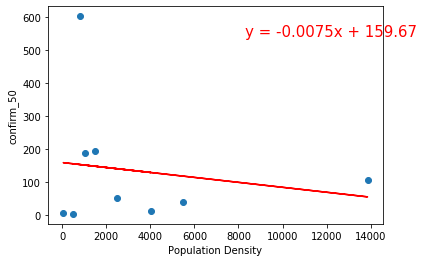

In [78]:
scatterplot('Population Density','confirm_50')